In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import nltk

In [ ]:
df=pd.read_csv('/content/Stock Headlines.csv',encoding='ISO-8859-1')

In [ ]:
df.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2000-01-03,0,A 'hindrance to operations': extracts from the...,Scorecard,Hughes' instant hit buoys Blues,Jack gets his skates on at ice-cold Alex,Chaos as Maracana builds up for United,Depleted Leicester prevail as Elliott spoils E...,Hungry Spurs sense rich pickings,Gunners so wide of an easy target,...,Flintoff injury piles on woe for England,Hunters threaten Jospin with new battle of the...,Kohl's successor drawn into scandal,The difference between men and women,"Sara Denver, nurse turned solicitor",Diana's landmine crusade put Tories in a panic,Yeltsin's resignation caught opposition flat-f...,Russian roulette,Sold out,Recovering a title
1,2000-01-04,0,Scorecard,The best lake scene,Leader: German sleaze inquiry,"Cheerio, boyo",The main recommendations,Has Cubie killed fees?,Has Cubie killed fees?,Has Cubie killed fees?,...,On the critical list,The timing of their lives,Dear doctor,Irish court halts IRA man's extradition to Nor...,Burundi peace initiative fades after rebels re...,PE points the way forward to the ECB,Campaigners keep up pressure on Nazi war crime...,Jane Ratcliffe,Yet more things you wouldn't know without the ...,Millennium bug fails to bite
2,2000-01-05,0,Coventry caught on counter by Flo,United's rivals on the road to Rio,Thatcher issues defence before trial by video,Police help Smith lay down the law at Everton,Tale of Trautmann bears two more retellings,England on the rack,Pakistan retaliate with call for video of Walsh,Cullinan continues his Cape monopoly,...,South Melbourne (Australia),Necaxa (Mexico),Real Madrid (Spain),Raja Casablanca (Morocco),Corinthians (Brazil),Tony's pet project,Al Nassr (Saudi Arabia),Ideal Holmes show,Pinochet leaves hospital after tests,Useful links
3,2000-01-06,1,Pilgrim knows how to progress,Thatcher facing ban,McIlroy calls for Irish fighting spirit,Leicester bin stadium blueprint,United braced for Mexican wave,"Auntie back in fashion, even if the dress look...",Shoaib appeal goes to the top,Hussain hurt by 'shambles' but lays blame on e...,...,Putin admits Yeltsin quit to give him a head s...,BBC worst hit as digital TV begins to bite,How much can you pay for...,Christmas glitches,"Upending a table, Chopping a line and Scoring ...","Scientific evidence 'unreliable', defence claims",Fusco wins judicial review in extradition case,Rebels thwart Russian advance,Blair orders shake-up of failing NHS,Lessons of law's hard heart
4,2000-01-07,1,Hitches and Horlocks,Beckham off but United survive,Breast cancer screening,Alan Parker,Guardian readers: are you all whingers?,Hollywood Beyond,Ashes and diamonds,Whingers - a formidable minority,...,Most everywhere: UDIs,Most wanted: Chloe lunettes,Return of the cane 'completely off the agenda',From Sleepy Hollow to Greeneland,Blunkett outlines vision for over 11s,"Embattled Dobson attacks 'play now, pay later'...",Doom and the Dome,What is the north-south divide?,Aitken released from jail,Gone aloft


In [ ]:
!pip install pandas-profiling==2.7.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 252 kB 5.1 MB/s 
     |████████████████████████████████| 690 kB 61.1 MB/s 
     |████████████████████████████████| 4.7 MB 48.5 MB/s 
     |████████████████████████████████| 58 kB 6.0 MB/s 
     |████████████████████████████████| 812 kB 51.8 MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=fdfffadc90f7cfb54294b19d35ba36c9e178360884c4c737c4ea2ab8a6105a9f
  Stored in directory: /root/.cache/pip/wheels/70/e1/52/5b14d250ba868768823940c3229e9950d201a26d0bd3ee8655
  Created wheel for imagehash: filename=ImageHash-4.2.1-py2.py3-none-any.whl size=295206 sha256=d3ff696d6da704108bc09cee5c86645155f2c1c84d0682a36331ecd1f2715571
  Stored in directory: /root/.cache/pip/wheels/4c/d5/59/5e3e297533ddb09407769762985d134135064c6831e29a914e
Successfully built htmlmin imagehash
  Attempting uninstall: pandas-profiling
    Foun

In [ ]:
#Change ABCIndexClass to ABCIndex,as the previous one is old now.
import pandas_profiling as pp
pp.ProfileReport(df)

Summarize dataset:   0%|          | 0/39 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
df.isna().sum()

Date     0
Label    0
Top1     0
Top2     0
Top3     0
Top4     0
Top5     0
Top6     0
Top7     0
Top8     0
Top9     0
Top10    0
Top11    0
Top12    0
Top13    0
Top14    0
Top15    0
Top16    0
Top17    0
Top18    0
Top19    0
Top20    0
Top21    0
Top22    0
Top23    1
Top24    3
Top25    3
dtype: int64

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.shape

(4098, 27)

In [ ]:
df['Date'].min() , df['Date'].max()

('2000-01-03', '2016-07-01')

In [ ]:
#dataset before 01/01/2015 will be considered as training dataset
train= df[df['Date']<'20150101']

#and rest is test dataset.
test= df[df['Date']>'20141231']

In [ ]:
#drop date and class label
data = train.iloc[:,2:27]

data.replace("[^a-zA-Z]"," ",regex=True,inplace=True)

In [ ]:
data.head()

,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,Top10,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,A hindrance to operations extracts from the...,Scorecard,Hughes instant hit buoys Blues,Jack gets his skates on at ice cold Alex,Chaos as Maracana builds up for United,Depleted Leicester prevail as Elliott spoils E...,Hungry Spurs sense rich pickings,Gunners so wide of an easy target,Derby raise a glass to Strupar s debut double,Southgate strikes Leeds pay the penalty,...,Flintoff injury piles on woe for England,Hunters threaten Jospin with new battle of the...,Kohl s successor drawn into scandal,The difference between men and women,Sara Denver nurse turned solicitor,Diana s landmine crusade put Tories in a panic,Yeltsin s resignation caught opposition flat f...,Russian roulette,Sold out,Recovering a title
1,Scorecard,The best lake scene,Leader German sleaze inquiry,Cheerio boyo,The main recommendations,Has Cubie killed fees,Has Cubie killed fees,Has Cubie killed fees,Hopkins furious at Foster s lack of Hannibal...,Has Cubie killed fees,...,On the critical list,The timing of their lives,Dear doctor,Irish court halts IRA man s extradition to Nor...,Burundi peace initiative fades after rebels re...,PE points the way forward to the ECB,Campaigners keep up pressure on Nazi war crime...,Jane Ratcliffe,Yet more things you wouldn t know without the ...,Millennium bug fails to bite
2,Coventry caught on counter by Flo,United s rivals on the road to Rio,Thatcher issues defence before trial by video,Police help Smith lay down the law at Everton,Tale of Trautmann bears two more retellings,England on the rack,Pakistan retaliate with call for video of Walsh,Cullinan continues his Cape monopoly,McGrath puts India out of their misery,Blair Witch bandwagon rolls on,...,South Melbourne Australia,Necaxa Mexico,Real Madrid Spain,Raja Casablanca Morocco,Corinthians Brazil,Tony s pet project,Al Nassr Saudi Arabia,Ideal Holmes show,Pinochet leaves hospital after tests,Useful links
3,Pilgrim knows how to progress,Thatcher facing ban,McIlroy calls for Irish fighting spirit,Leicester bin stadium blueprint,United braced for Mexican wave,Auntie back in fashion even if the dress look...,Shoaib appeal goes to the top,Hussain hurt by shambles but lays blame on e...,England s decade of disasters,Revenge is sweet for jubilant Cronje,...,Putin admits Yeltsin quit to give him a head s...,BBC worst hit as digital TV begins to bite,How much can you pay for,Christmas glitches,Upending a table Chopping a line and Scoring ...,Scientific evidence unreliable defence claims,Fusco wins judicial review in extradition case,Rebels thwart Russian advance,Blair orders shake up of failing NHS,Lessons of law s hard heart
4,Hitches and Horlocks,Beckham off but United survive,Breast cancer screening,Alan Parker,Guardian readers are you all whingers,Hollywood Beyond,Ashes and diamonds,Whingers a formidable minority,Alan Parker part two,Thuggery Toxins and Ties,...,Most everywhere UDIs,Most wanted Chloe lunettes,Return of the cane completely off the agenda,From Sleepy Hollow to Greeneland,Blunkett outlines vision for over s,Embattled Dobson attacks play now pay later ...,Doom and the Dome,What is the north south divide,Aitken released from jail,Gone aloft


In [ ]:
#making column names as 0,1,2,3.... for simplicity and ease
list1= [i for i in range(25)]
new_index= [str(i) for i in list1]
data.columns= new_index
data.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,A hindrance to operations extracts from the...,Scorecard,Hughes instant hit buoys Blues,Jack gets his skates on at ice cold Alex,Chaos as Maracana builds up for United,Depleted Leicester prevail as Elliott spoils E...,Hungry Spurs sense rich pickings,Gunners so wide of an easy target,Derby raise a glass to Strupar s debut double,Southgate strikes Leeds pay the penalty,...,Flintoff injury piles on woe for England,Hunters threaten Jospin with new battle of the...,Kohl s successor drawn into scandal,The difference between men and women,Sara Denver nurse turned solicitor,Diana s landmine crusade put Tories in a panic,Yeltsin s resignation caught opposition flat f...,Russian roulette,Sold out,Recovering a title
1,Scorecard,The best lake scene,Leader German sleaze inquiry,Cheerio boyo,The main recommendations,Has Cubie killed fees,Has Cubie killed fees,Has Cubie killed fees,Hopkins furious at Foster s lack of Hannibal...,Has Cubie killed fees,...,On the critical list,The timing of their lives,Dear doctor,Irish court halts IRA man s extradition to Nor...,Burundi peace initiative fades after rebels re...,PE points the way forward to the ECB,Campaigners keep up pressure on Nazi war crime...,Jane Ratcliffe,Yet more things you wouldn t know without the ...,Millennium bug fails to bite
2,Coventry caught on counter by Flo,United s rivals on the road to Rio,Thatcher issues defence before trial by video,Police help Smith lay down the law at Everton,Tale of Trautmann bears two more retellings,England on the rack,Pakistan retaliate with call for video of Walsh,Cullinan continues his Cape monopoly,McGrath puts India out of their misery,Blair Witch bandwagon rolls on,...,South Melbourne Australia,Necaxa Mexico,Real Madrid Spain,Raja Casablanca Morocco,Corinthians Brazil,Tony s pet project,Al Nassr Saudi Arabia,Ideal Holmes show,Pinochet leaves hospital after tests,Useful links
3,Pilgrim knows how to progress,Thatcher facing ban,McIlroy calls for Irish fighting spirit,Leicester bin stadium blueprint,United braced for Mexican wave,Auntie back in fashion even if the dress look...,Shoaib appeal goes to the top,Hussain hurt by shambles but lays blame on e...,England s decade of disasters,Revenge is sweet for jubilant Cronje,...,Putin admits Yeltsin quit to give him a head s...,BBC worst hit as digital TV begins to bite,How much can you pay for,Christmas glitches,Upending a table Chopping a line and Scoring ...,Scientific evidence unreliable defence claims,Fusco wins judicial review in extradition case,Rebels thwart Russian advance,Blair orders shake up of failing NHS,Lessons of law s hard heart
4,Hitches and Horlocks,Beckham off but United survive,Breast cancer screening,Alan Parker,Guardian readers are you all whingers,Hollywood Beyond,Ashes and diamonds,Whingers a formidable minority,Alan Parker part two,Thuggery Toxins and Ties,...,Most everywhere UDIs,Most wanted Chloe lunettes,Return of the cane completely off the agenda,From Sleepy Hollow to Greeneland,Blunkett outlines vision for over s,Embattled Dobson attacks play now pay later ...,Doom and the Dome,What is the north south divide,Aitken released from jail,Gone aloft


In [ ]:
for index in new_index:
  data[index]= data[index].str.lower() #lowercase conversion
data.head(2)

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,a hindrance to operations extracts from the...,scorecard,hughes instant hit buoys blues,jack gets his skates on at ice cold alex,chaos as maracana builds up for united,depleted leicester prevail as elliott spoils e...,hungry spurs sense rich pickings,gunners so wide of an easy target,derby raise a glass to strupar s debut double,southgate strikes leeds pay the penalty,...,flintoff injury piles on woe for england,hunters threaten jospin with new battle of the...,kohl s successor drawn into scandal,the difference between men and women,sara denver nurse turned solicitor,diana s landmine crusade put tories in a panic,yeltsin s resignation caught opposition flat f...,russian roulette,sold out,recovering a title
1,scorecard,the best lake scene,leader german sleaze inquiry,cheerio boyo,the main recommendations,has cubie killed fees,has cubie killed fees,has cubie killed fees,hopkins furious at foster s lack of hannibal...,has cubie killed fees,...,on the critical list,the timing of their lives,dear doctor,irish court halts ira man s extradition to nor...,burundi peace initiative fades after rebels re...,pe points the way forward to the ecb,campaigners keep up pressure on nazi war crime...,jane ratcliffe,yet more things you wouldn t know without the ...,millennium bug fails to bite


In [ ]:
#joining all the headlines into a single one

headlines = []
for row in range(0,len(data.index)):
  headlines.append(' '.join(str(x) for x in data.iloc[row,0:25]))

In [ ]:
headlines

['a  hindrance to operations   extracts from the leaked reports scorecard hughes  instant hit buoys blues jack gets his skates on at ice cold alex chaos as maracana builds up for united depleted leicester prevail as elliott spoils everton s party hungry spurs sense rich pickings gunners so wide of an easy target derby raise a glass to strupar s debut double southgate strikes  leeds pay the penalty hammers hand robson a youthful lesson saints party like it s      wear wolves have turned into lambs stump mike catches testy gough s taunt langer escapes to hit     flintoff injury piles on woe for england hunters threaten jospin with new battle of the somme kohl s successor drawn into scandal the difference between men and women sara denver  nurse turned solicitor diana s landmine crusade put tories in a panic yeltsin s resignation caught opposition flat footed russian roulette sold out recovering a title',
 'scorecard the best lake scene leader  german sleaze inquiry cheerio  boyo the main

In [ ]:
from wordcloud import WordCloud
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
headlines[0]

'a  hindrance to operations   extracts from the leaked reports scorecard hughes  instant hit buoys blues jack gets his skates on at ice cold alex chaos as maracana builds up for united depleted leicester prevail as elliott spoils everton s party hungry spurs sense rich pickings gunners so wide of an easy target derby raise a glass to strupar s debut double southgate strikes  leeds pay the penalty hammers hand robson a youthful lesson saints party like it s      wear wolves have turned into lambs stump mike catches testy gough s taunt langer escapes to hit     flintoff injury piles on woe for england hunters threaten jospin with new battle of the somme kohl s successor drawn into scandal the difference between men and women sara denver  nurse turned solicitor diana s landmine crusade put tories in a panic yeltsin s resignation caught opposition flat footed russian roulette sold out recovering a title'

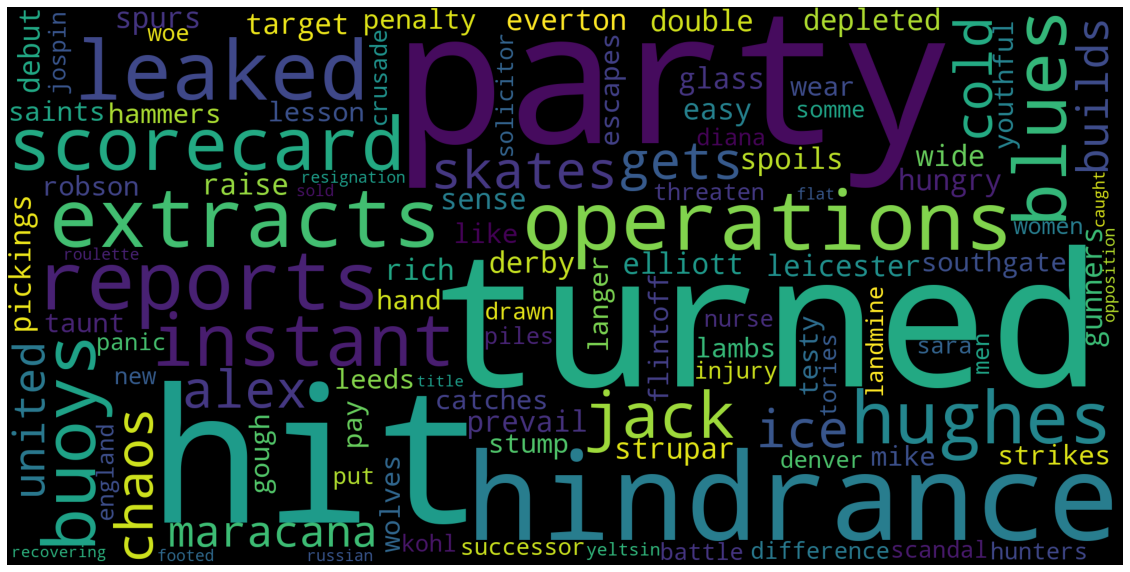

In [ ]:
#wordcloud for paragrpah at first row.

text=headlines[0]
wordcloud = WordCloud(width = 2000, height = 1000, random_state=42, 
                      background_color='black', collocations=False,
                      stopwords= stopwords.words('english')).generate(text)
plt.figure(figsize=(20, 30))
# Display image
plt.imshow(wordcloud) 
plt.axis("off")
plt.show()

In [ ]:
df.Label[0] #First row Stock Prediction.

0

In [ ]:
#most frequent words for the first row headlines paragraph
from collections import Counter
from nltk.tokenize import word_tokenize,sent_tokenize
nltk.download('punkt')

w= word_tokenize(headlines[0])
w= [word for word in w if word not in stopwords.words('english')]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


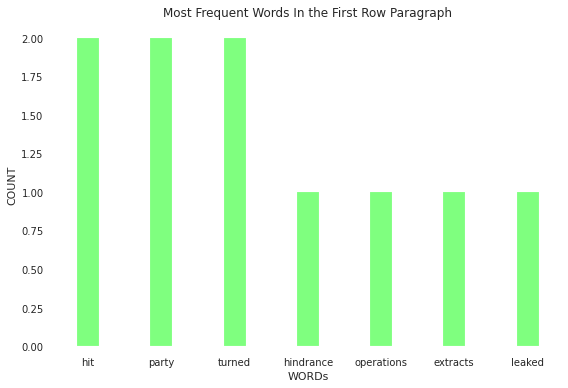

In [ ]:
Counter = Counter(w)
freq=Counter.most_common(7)

n_groups = len(freq)
cnt= [x[1] for x in freq]
wrd= [x[0] for x in freq]

fig,ax= plt.subplots()

index= np.arange(n_groups)

fig=plt.bar(index,cnt,0.3,alpha=0.5,
            color='lime',label='word-count')
plt.xlabel('WORDs')
plt.ylabel('COUNT')
plt.title('Most Frequent Words In the First Row Paragraph')
plt.xticks(index,wrd)
plt.tight_layout()
plt.show()

In [ ]:
len(headlines)

3972

removing stopwords from the headlines.

In [ ]:
hd=[]
for i in range(len(headlines)):
  headlines[i]=word_tokenize(headlines[i])
  headlines[i]=[word for word in headlines[i] if word not in stopwords.words('english')]
  headlines[i]=' '.join(headlines[i])
  hd.append(headlines[i])

In [ ]:
hd

['hindrance operations extracts leaked reports scorecard hughes instant hit buoys blues jack gets skates ice cold alex chaos maracana builds united depleted leicester prevail elliott spoils everton party hungry spurs sense rich pickings gunners wide easy target derby raise glass strupar debut double southgate strikes leeds pay penalty hammers hand robson youthful lesson saints party like wear wolves turned lambs stump mike catches testy gough taunt langer escapes hit flintoff injury piles woe england hunters threaten jospin new battle somme kohl successor drawn scandal difference men women sara denver nurse turned solicitor diana landmine crusade put tories panic yeltsin resignation caught opposition flat footed russian roulette sold recovering title',
 'scorecard best lake scene leader german sleaze inquiry cheerio boyo main recommendations cubie killed fees cubie killed fees cubie killed fees hopkins furious foster lack hannibal appetite cubie killed fees tale two tails say like like

THE 2 VECTORIZATION METHODS USED HERE ARE:

1. BAG OF WORDS
2. TFIDF

### RandomForest with BagofWords:

In [178]:
from sklearn.feature_extraction.text import CountVectorizer
countvector= CountVectorizer(ngram_range=(2,2))
traindataset = countvector.fit_transform(hd)

In [179]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=300,criterion='entropy',random_state=42)
clf.fit(traindataset,train['Label'])

RandomForestClassifier(criterion='entropy', n_estimators=300, random_state=42)

In [180]:
test_transform=[]
for row in range(0,len(test.index)):
    test_transform.append(' '.join(str(x) for x in test.iloc[row,2:27]))
test_dataset= countvector.transform(test_transform)
predictions= clf.predict(test_dataset)

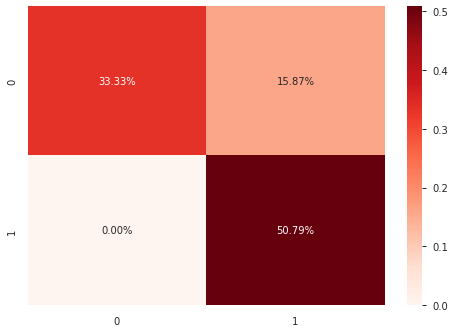

In [181]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
matrix= confusion_matrix(test["Label"],predictions)
sns.heatmap(matrix/np.sum(matrix), annot = True, fmt=  '0.2%', cmap = 'Reds')

In [182]:
score1 = accuracy_score(test["Label"],predictions)
score1 = round(score1, 4)*100
print(score1)

84.13000000000001


In [183]:
print(classification_report(test['Label'],predictions))

              precision    recall  f1-score   support

           0       1.00      0.68      0.81       186
           1       0.76      1.00      0.86       192

    accuracy                           0.84       378
   macro avg       0.88      0.84      0.84       378
weighted avg       0.88      0.84      0.84       378



### RandomForest using TF-IDF

In [215]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf= TfidfVectorizer(ngram_range=(2,2))
traindataset = tf.fit_transform(hd)

In [236]:
clf= RandomForestClassifier(n_estimators=400,criterion='entropy',random_state=42)
clf.fit(traindataset,train['Label'])

RandomForestClassifier(criterion='entropy', n_estimators=400, random_state=42)

In [237]:
test_transform=[]
for row in range(0,len(test.index)):
    test_transform.append(' '.join(str(x) for x in test.iloc[row,2:27]))
test_dataset = tf.transform(test_transform)
predictions= clf.predict(test_dataset)

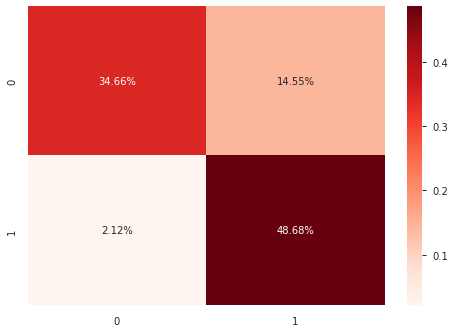

In [238]:
# Confusion Matrix
matrix= confusion_matrix(test["Label"],predictions)
sns.heatmap(matrix/np.sum(matrix), annot = True, fmt=  '0.2%', cmap = 'Reds')

In [239]:
score2 = accuracy_score(test["Label"],predictions)
score2 = round(score2 , 4)*100
print(score2)

83.33


In [240]:
# Classification Report

print(classification_report(test['Label'],predictions))

              precision    recall  f1-score   support

           0       0.94      0.70      0.81       186
           1       0.77      0.96      0.85       192

    accuracy                           0.83       378
   macro avg       0.86      0.83      0.83       378
weighted avg       0.85      0.83      0.83       378



### Naive Bayes (MultinomialNB) and BagofWords

In [332]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()
cv= CountVectorizer(ngram_range=(2,5))
traindata= cv.fit_transform(hd)

In [333]:
nb.fit(traindata,train['Label'])

MultinomialNB()

In [334]:
test_transform=[]
for row in range(0,len(test.index)):
    test_transform.append(' '.join(str(x) for x in test.iloc[row,2:27]))
test_dataset= cv.transform(test_transform)
predictions= nb.predict(test_dataset)

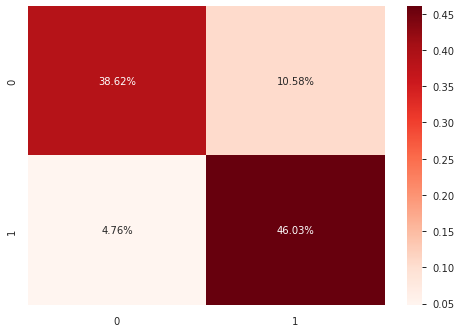

In [335]:
matrix= confusion_matrix(test["Label"],predictions)
sns.heatmap(matrix/np.sum(matrix), annot = True, fmt=  '0.2%', cmap = 'Reds')

In [336]:
score3 = accuracy_score(test["Label"],predictions)
score3 = round(score3, 4)*100
print(score3)

84.66


In [337]:
print(classification_report(test['Label'],predictions))

              precision    recall  f1-score   support

           0       0.89      0.78      0.83       186
           1       0.81      0.91      0.86       192

    accuracy                           0.85       378
   macro avg       0.85      0.85      0.85       378
weighted avg       0.85      0.85      0.85       378



### NAIVE BAYES CLASSIFIER WITH TF-IDF VECTORIZER

In [340]:
tf= TfidfVectorizer(ngram_range=(2,6))
traindata= tf.fit_transform(headlines)
nb.fit(traindata,train['Label'])

MultinomialNB()

In [341]:
test_transform=[]
for row in range(0,len(test.index)):
    test_transform.append(' '.join(str(x) for x in test.iloc[row,2:27]))
test_dataset= tf.transform(test_transform)
predictions= nb.predict(test_dataset)

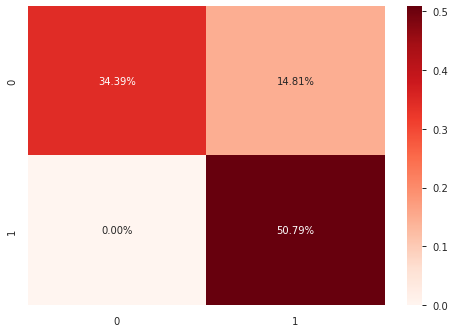

In [342]:
matrix= confusion_matrix(test["Label"],predictions)
sns.heatmap(matrix/np.sum(matrix), annot = True, fmt=  '0.2%', cmap = 'Reds')

In [343]:
score4 = accuracy_score(test["Label"],predictions)
score4 = round(score4, 4)*100
print(score4)

85.19


In [344]:
report= classification_report(test['Label'],predictions)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.70      0.82       186
           1       0.77      1.00      0.87       192

    accuracy                           0.85       378
   macro avg       0.89      0.85      0.85       378
weighted avg       0.89      0.85      0.85       378



Comparing ACcuracies of different Models:


,Model,Accuracy_score
3,Naive Bayes (TF-IDF),85.19
2,Naive Bayes (BoW),84.66
0,Random Forest (Bow),84.13
1,Random Forest (TF-IDF),84.13


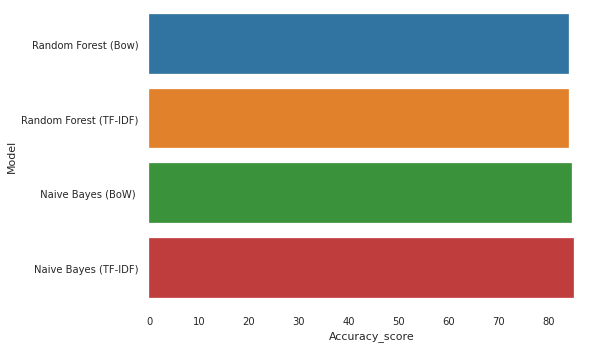

In [339]:
models = pd.DataFrame({
    'Model':['Random Forest (Bow)', 'Random Forest (TF-IDF)', ' Naive Bayes (BoW) ', 'Naive Bayes (TF-IDF)'],
    'Accuracy_score' : [score1, score1, score3, score4]
})
models
sns.barplot(x='Accuracy_score', y='Model', data=models)

models.sort_values(by='Accuracy_score', ascending=False)

Conclusion: WE ARE ABLE TO ACHIEVE AN ACCURACY OF ~ 85.2% .